1. Import data and Preparation

In [4]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#read data
df = pd.read_csv(r"D:\Hoctap\PersonalProject\LifestyleandWellbeing\data\Wellbeing_and_lifestyle_data_Kaggle.csv")
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [6]:
#get dataset columns
cols = df.columns.to_list()
cols

['Timestamp',
 'FRUITS_VEGGIES',
 'DAILY_STRESS',
 'PLACES_VISITED',
 'CORE_CIRCLE',
 'SUPPORTING_OTHERS',
 'SOCIAL_NETWORK',
 'ACHIEVEMENT',
 'DONATION',
 'BMI_RANGE',
 'TODO_COMPLETED',
 'FLOW',
 'DAILY_STEPS',
 'LIVE_VISION',
 'SLEEP_HOURS',
 'LOST_VACATION',
 'DAILY_SHOUTING',
 'SUFFICIENT_INCOME',
 'PERSONAL_AWARDS',
 'TIME_FOR_PASSION',
 'WEEKLY_MEDITATION',
 'AGE',
 'GENDER',
 'WORK_LIFE_BALANCE_SCORE']

In [7]:
df["AGE"].value_counts() #age type and value
df["AGE"] = df["AGE"].replace("Less than 20", "20 or less") #replace age group: Less than 20 to 20 or less

In [8]:
desc = df.describe().round(2) #descriptive statistics with round 2 number after the dot
desc = desc.reset_index() #change desc index from descriptive variables to ascending value
desc_value = desc["index"].to_list() #create a list inclue all descriptive value
desc = desc.drop(columns=["index"]) #drop index column
desc

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00,15972.00
1,2.92,5.23,5.51,5.62,6.47,4.00,2.72,1.41,5.75,3.19,5.70,3.75,7.04,2.90,2.93,1.73,5.71,3.33,6.23,666.75
2,1.44,3.31,2.84,3.24,3.09,2.76,1.85,0.49,2.62,2.36,2.89,3.23,1.20,3.69,2.68,0.44,3.09,2.73,3.02,45.02
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,480.00
4,2.00,2.00,3.00,3.00,4.00,2.00,1.00,1.00,4.00,1.00,3.00,1.00,6.00,0.00,1.00,1.00,3.00,1.00,4.00,636.00
5,3.00,5.00,5.00,5.00,6.00,3.00,3.00,1.00,6.00,3.00,5.00,3.00,7.00,0.00,2.00,2.00,5.00,3.00,7.00,667.70
6,4.00,8.00,8.00,10.00,10.00,6.00,5.00,2.00,8.00,5.00,8.00,5.00,8.00,5.00,4.00,2.00,9.00,5.00,10.00,698.50
7,5.00,10.00,10.00,10.00,10.00,10.00,5.00,2.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,2.00,10.00,10.00,10.00,820.20


In [9]:
fr = desc["FRUITS_VEGGIES"].to_list()
fr

[15972.0, 2.92, 1.44, 0.0, 2.0, 3.0, 4.0, 5.0]

In [10]:
desc_rs = pd.DataFrame(columns=desc_value)
desc_rs

,count,mean,std,min,25%,50%,75%,max


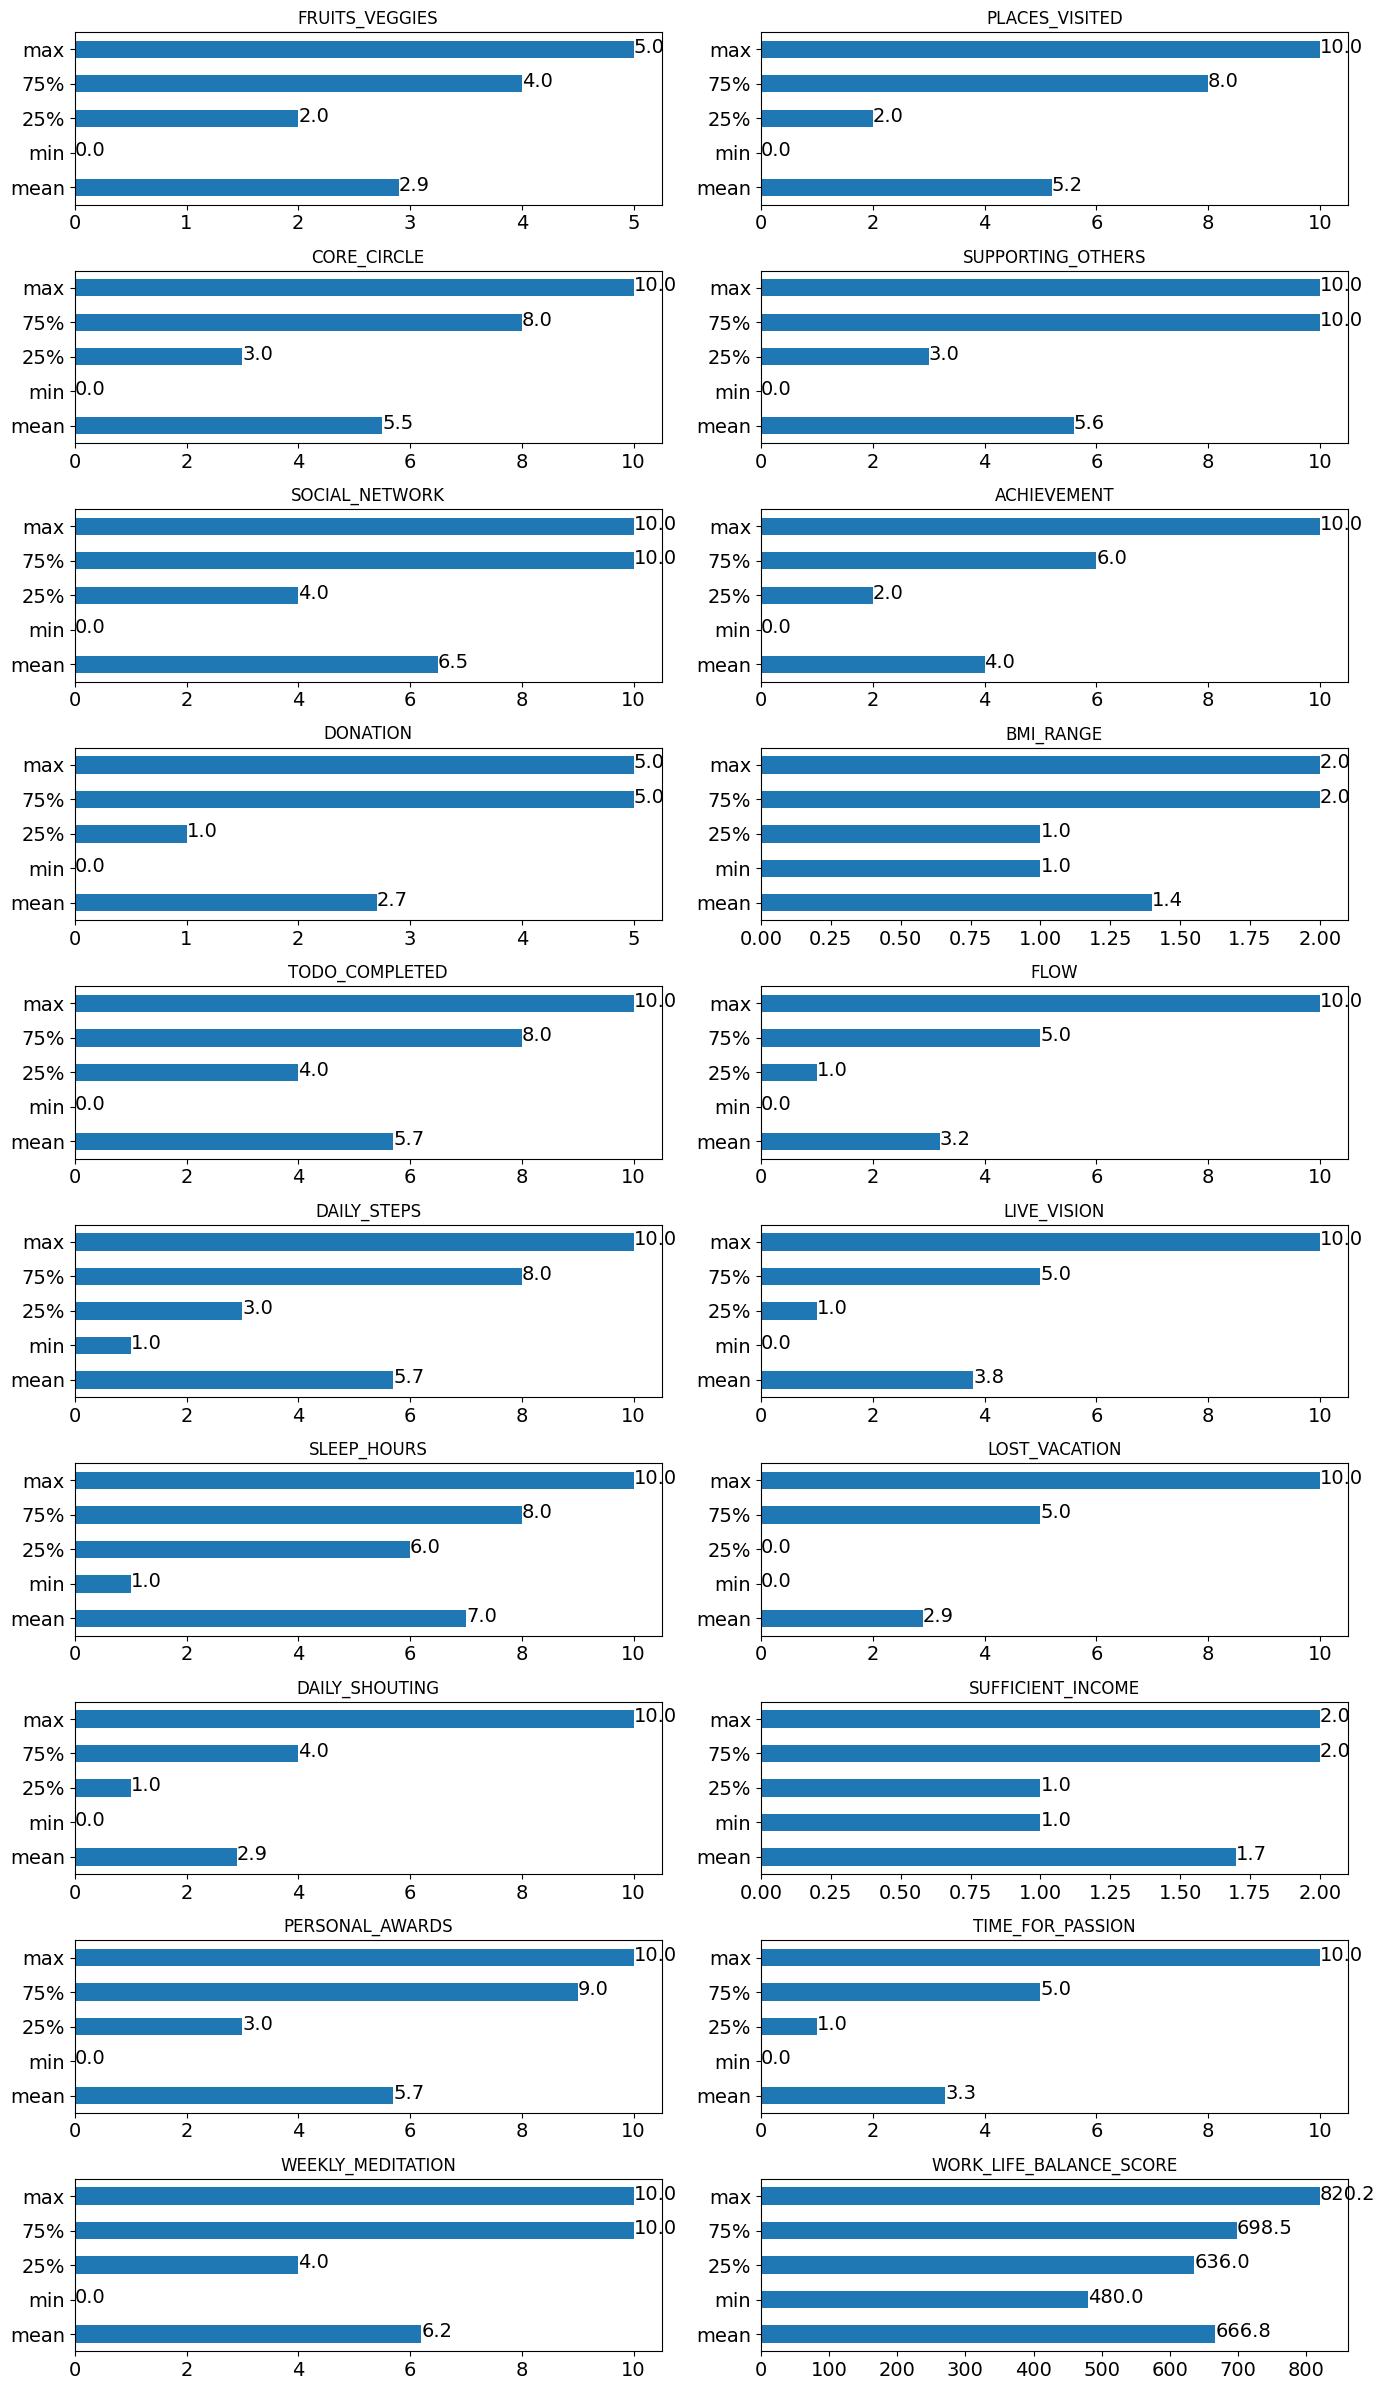

In [11]:
def descriptive(df):
    desc=df.describe().round(1).drop({'count', 'std', '50%'}, axis=0)
    i=-0.1
    j=0
    Row = int(round(len(desc.columns.tolist())/2+0.1))
    f,ax = plt.subplots(Row,2, figsize=(28,18))
    for name in desc.columns.tolist():
        desc[name].plot(kind='barh', figsize=(14,24), title=name, ax=ax[round(i), j], fontsize=14)
        for k, v in enumerate(desc[name].tolist()):
            ax[round(i), j].text(v, k-0.1, str(v), color='black', size = 14)
        i +=0.5
        if j==0: j=1
        else: j=0
    f.tight_layout()
descriptive(df)

2. Exploratory data analysis

2.1. Healthy body

In [15]:
body = df.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'])
body.head(5)

GENDER,Female,Male
AGE,,
20 or less,1.226291,1.224138
21 to 35,1.357809,1.327620
36 to 50,1.465046,1.521842
51 or more,1.525535,1.524113


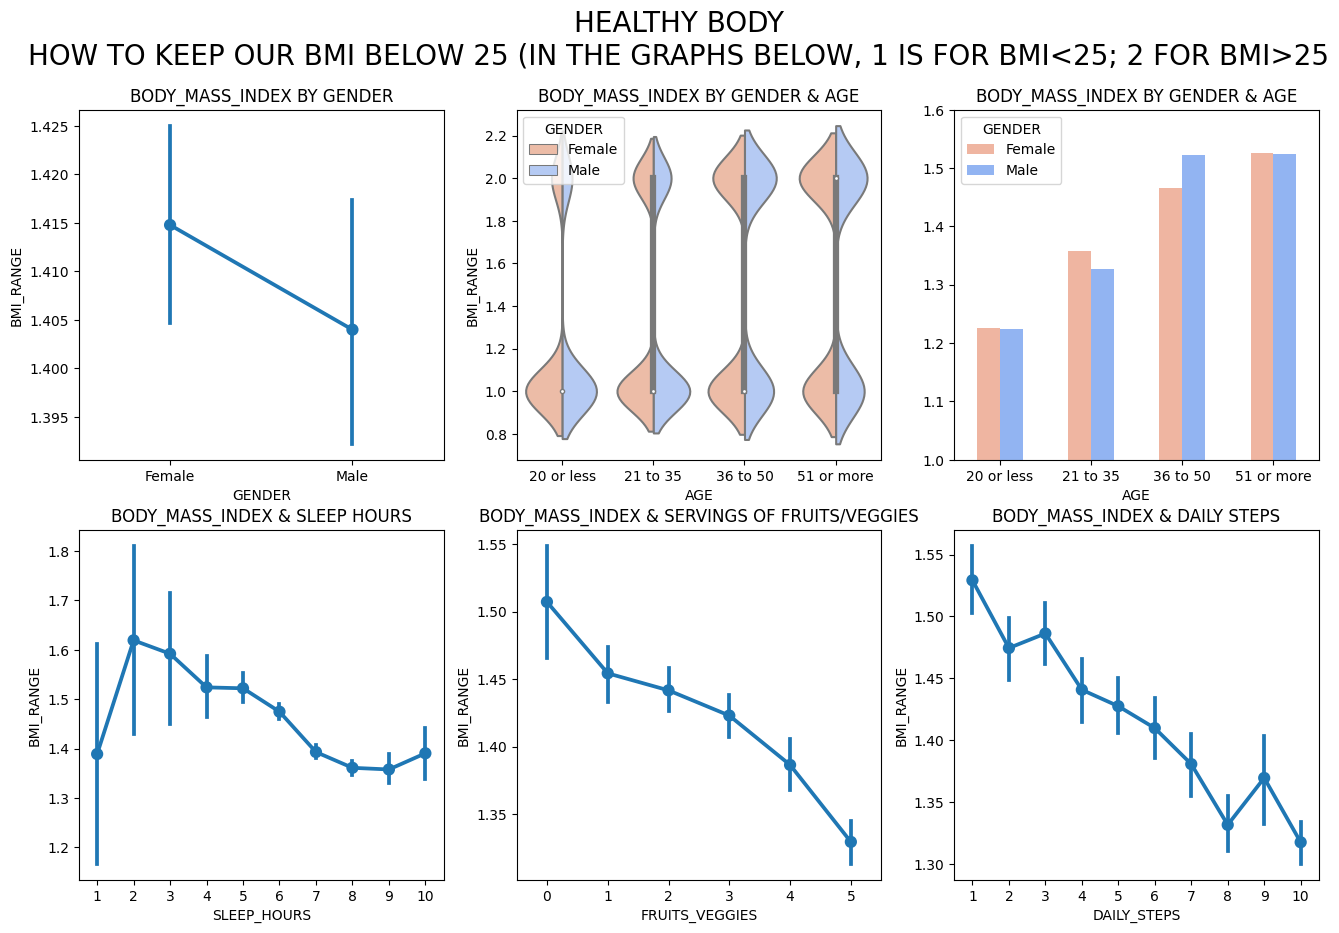

In [16]:
# HEALTHY BODY
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('BODY_MASS_INDEX BY GENDER')
ax[0,1].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[0,2].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[1,0].set_title('BODY_MASS_INDEX & SLEEP HOURS')
ax[1,1].set_title('BODY_MASS_INDEX & SERVINGS OF FRUITS/VEGGIES')
ax[1,2].set_title('BODY_MASS_INDEX & DAILY STEPS')

sns.pointplot(x = 'GENDER', y = 'BMI_RANGE',  data=df, ax = ax[0,0])
sns.violinplot(x = 'AGE', y = 'BMI_RANGE', hue = 'GENDER', data = df, palette='coolwarm_r',
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,1])

ax[0,2].set_ylim([1, 1.6])
body.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,2])
ax[0,2].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=df, ax = ax[1,1])
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY BODY\nHOW TO KEEP OUR BMI BELOW 25 (IN THE GRAPHS BELOW, 1 IS FOR BMI<25; 2 FOR BMI>25', fontsize=20)
plt.show()

*Nhận xét:* 1-Chỉ số BMI dưới 25; 2-Chỉ số BMI trên 25
- Chỉ số BMI có tương quan dương mạnh với số lượng bước chân người đó di chuyện trong một ngày. Cụ thể nếu một người một ngày di chuyển khoảng 5000 bước thì sẽ ảnh hưởng khoảng 15% đến chỉ số BMI của người đó (so với những người chỉ di chuyển khoảng 1000 bước).
- Trong khi đó chỉ số BMI lại tương quan nghịch với lượng rau quả người đó tiêu thụ (rau quả). Một người ăn nhiều rau củ quả (gấp 5 lần so với người không ăn) cũng sẽ có chỉ số BMI thấp hơn khoảng 15%.
- Bên cạnh đó trung bình chỉ số BMI giữa hai nhóm giới tính khá giống nhau giữa hai nhóm tuổi "less than 20" và "51 or more". Tuy nhiên chỉ số này lại có sự khác biệt rất lớn với hai nhóm tuổi còn lại khi với nhóm "21 to 35" thì BMI của phụ nữ cao hơn đàn ông và ngược lại với nhóm tuổi "36 to 50".

2.2. Healthy mind

In [14]:
df['DAILY_STRESS']=pd.to_numeric(df['DAILY_STRESS'],errors = 'coerce')

In [17]:
mind = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
mind.head()

GENDER,Female,Male
AGE,,
20 or less,3.045070,2.347480
21 to 35,2.992375,2.569758
36 to 50,2.948666,2.799292
51 or more,2.728939,2.418562


In [18]:
mind = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
mind.head()

GENDER,Female,Male
AGE,,
20 or less,3.045070,2.347480
21 to 35,2.992375,2.569758
36 to 50,2.948666,2.799292
51 or more,2.728939,2.418562


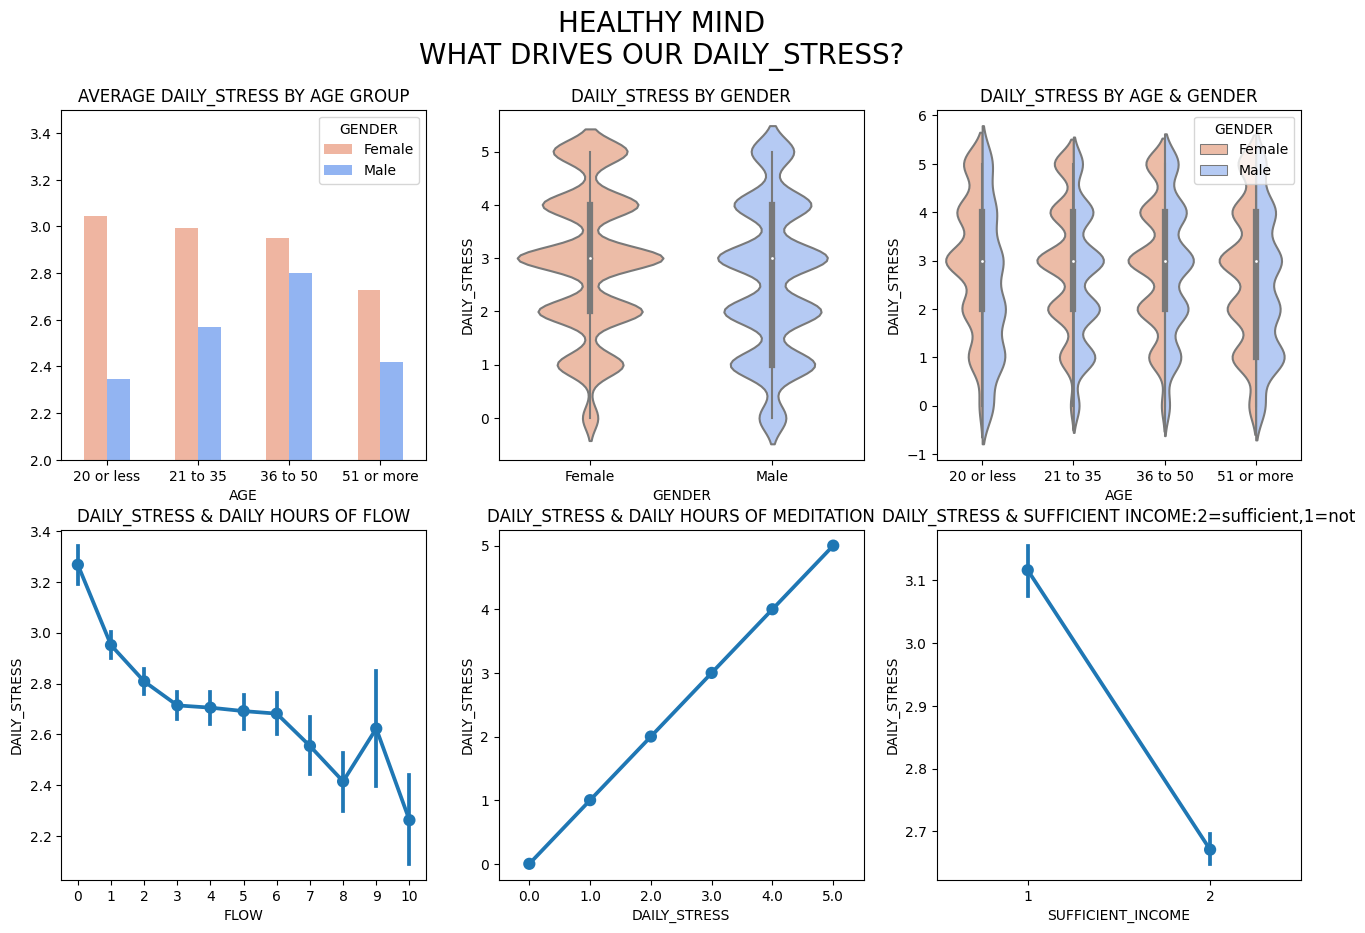

In [19]:
# HEALTHY MIND
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE DAILY_STRESS BY AGE GROUP')
ax[0,1].set_title('DAILY_STRESS BY GENDER')
ax[0,2].set_title('DAILY_STRESS BY AGE & GENDER')
ax[1,0].set_title('DAILY_STRESS & DAILY HOURS OF FLOW')
ax[1,1].set_title('DAILY_STRESS & DAILY HOURS OF MEDITATION')
ax[1,2].set_title('DAILY_STRESS & SUFFICIENT INCOME:2=sufficient,1=not')

ax[0,0].set_ylim([2, 3.5])
mind.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='DAILY_STRESS', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'DAILY_STRESS', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'FLOW', y = 'DAILY_STRESS',  data=df, ax = ax[1,0])
sns.pointplot(x = 'DAILY_STRESS', y = 'DAILY_STRESS', data=df, ax = ax[1,1])
sns.pointplot(x = 'SUFFICIENT_INCOME', y = 'DAILY_STRESS',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY MIND\nWHAT DRIVES OUR DAILY_STRESS?', fontsize=20)
plt.show()

*Nhận xét:* 
- Ở nữ giới, sự stress của họ đạt đỉnh điểm khi họ còn trẻ và giảm dần khi độ tuổi của họ lớn hơn. Lí giải cho giai đoạn này, phụ nữ phải chịu các áp lực về mặt học tập, công việc, gia đình, đặc biệt nhất là trong giai đoạn sinh con đi kèm với cái vấn đề tâm lí cực kì lớn. 
- Số ngày stress trong năm của nữ giới cũng cao hơn nam giới ở tất cả các nhóm tuổi bởi về mặt cấu trúc sinh học, nữ giới bị ảnh hưởng bởi các vấn đề tinh thần nhiều hơn, khả năng chịu đựng stress của họ cũng không cao bằng nam giới.
- Việc duy trình nhịp sống ổn định, các phương pháp thiền định và có nguồn thu nhập ổn định để chi trả cho sinh hoạt phí thường ngày góp phần giảm 30% mức độ của stress.

2.3. Expertise

In [20]:
expertise = df.pivot_table(values='ACHIEVEMENT', index=['AGE'], columns=['GENDER'], )
expertise.head()

GENDER,Female,Male
AGE,,
20 or less,4.352113,4.086207
21 to 35,3.887602,3.781067
36 to 50,3.996285,4.156434
51 or more,4.012222,4.227480


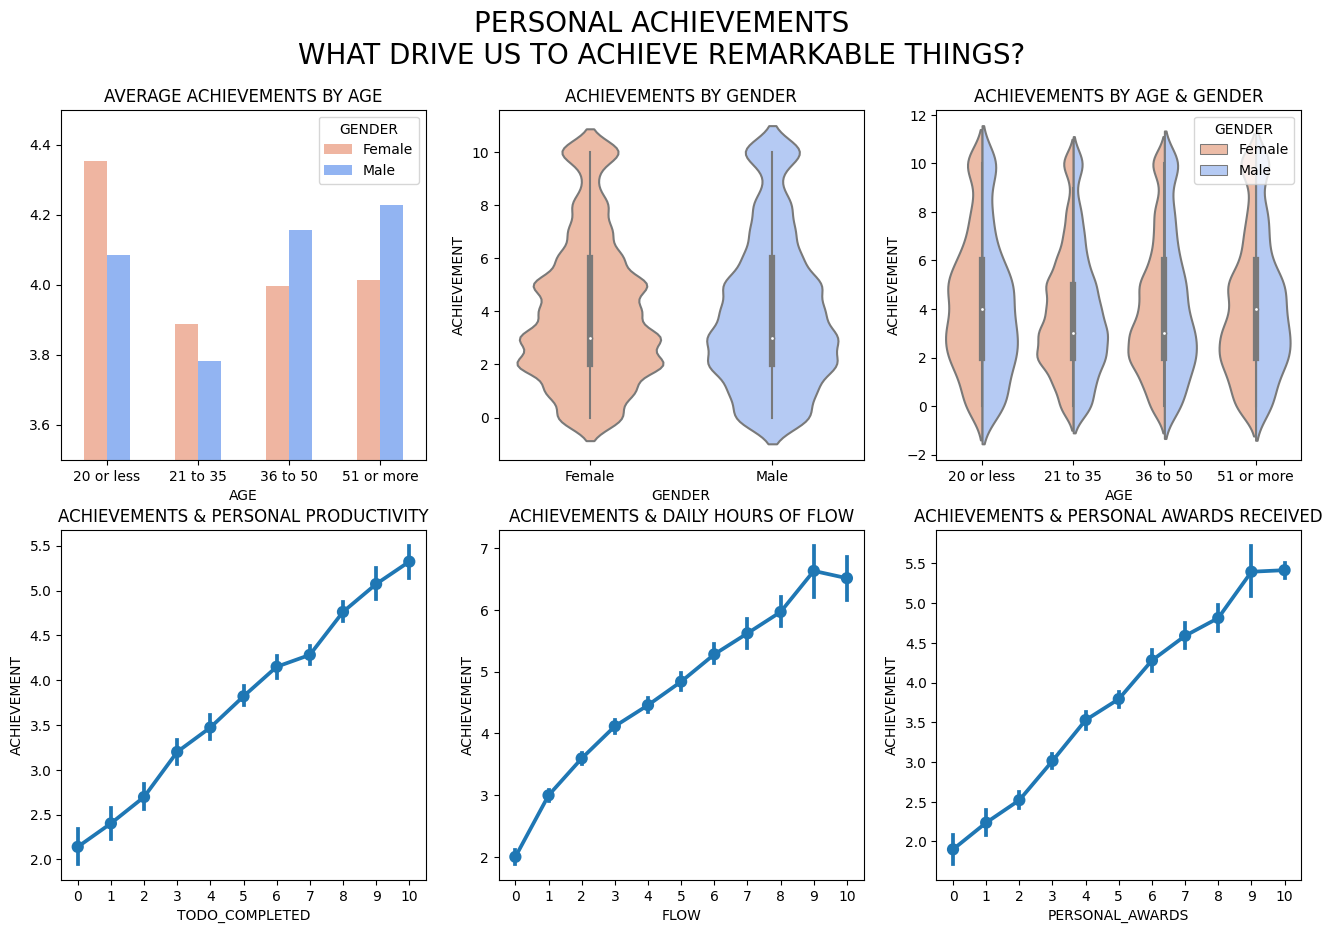

In [21]:
# EXPERTISE
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE ACHIEVEMENTS BY AGE')
ax[0,1].set_title('ACHIEVEMENTS BY GENDER')
ax[0,2].set_title('ACHIEVEMENTS BY AGE & GENDER')
ax[1,0].set_title('ACHIEVEMENTS & PERSONAL PRODUCTIVITY')
ax[1,1].set_title('ACHIEVEMENTS & DAILY HOURS OF FLOW')
ax[1,2].set_title('ACHIEVEMENTS & PERSONAL AWARDS RECEIVED')

ax[0,0].set_ylim([3.5, 4.5])
expertise.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='ACHIEVEMENT', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'ACHIEVEMENT', palette='coolwarm_r', hue = 'GENDER', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'TODO_COMPLETED',  y = 'ACHIEVEMENT',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FLOW',  y = 'ACHIEVEMENT',  data=df, ax = ax[1,1])
sns.pointplot(x = 'PERSONAL_AWARDS', y = 'ACHIEVEMENT',  data=df, ax = ax[1,2])

f.suptitle('PERSONAL ACHIEVEMENTS\nWHAT DRIVE US TO ACHIEVE REMARKABLE THINGS?', fontsize=20)
plt.show()

*Nhận xét:* 
- Có thể thấy nữ giới đạt được thành tựu trong công việc khá sớm trong khi đó nam giới phải sau giai đoạn 36 tuổi mới có thể chạm đến thành tự trong công việc của mình. Một lí giải cho điều này là khi nữ giới có sự trưởng thành khá sớm trong mặt suy nghĩ và họ sẽ chững lại công việc của mình sau khi lập gia đình; trong khi đó nam giới sau khi có gia đình, khi đã có hậu thuẫn họ mới hoàn toàn tập trung cho công việc của mình và đạt được những thành tựu trong công việc trễ hơn.
- Thành tựu công việc cũng chịu ảnh hưởng rất lớn bởi hiệu suất làm việc trong ngày, thói quen làm việc.

2.4. Connection

In [22]:
connection = df.pivot_table(values='CORE_CIRCLE', index=['AGE'], columns=['GENDER'], )
connection.head()

GENDER,Female,Male
AGE,,
20 or less,5.781221,5.484085
21 to 35,5.603784,5.105960
36 to 50,5.789936,5.159386
51 or more,5.798341,5.063694
